In [1]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    l l1 P=3
    s s1 l1.p1 Min.p1 L=1

    # The cavity
    m Min R=0.9937 L=0
    s scav Min.p2 Mend.p1 L=1
    m Mend R=1 L=0 phi=-0.048  # Roughly 40kHz detuning

    # Suspend mirrors on pendula
    pendulum sus1 Min.mech mass=0.25 fz=1 Qz=1000
    pendulum sus2 Mend.mech mass=0.25 fz=1 Qz=1000

    # Apply a `force signal' to the end mirror
    fsig(1)
    sgen force Mend.mech.F_z

    # we want to measure the longitudinal motion signal of both mirrors
    xd Mend_z Mend.mech.z
    xd Min_z Min.mech.z

    xaxis(fsig.f, log, 0.1, 1k, 300)
    """
)

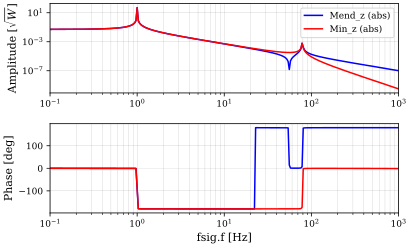

In [2]:
out = kat.run()
out.plot(log=True);